<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,0.611380,85.993907,85.372306,0.621601
1,0.0,1.0,51.481689,45.456425,-1.792311,105.145803,106.924787,-1.778983
2,0.0,2.0,56.171223,44.358325,-0.414808,110.114740,110.521792,-0.407051
3,0.0,3.0,21.954529,40.768202,0.689288,73.412019,72.678746,0.733273
4,0.0,4.0,27.603475,78.106419,-1.487861,114.222033,115.657879,-1.435846
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-0.739647,150.581728,151.297897,-0.716169
249996,999.0,246.0,54.304775,51.817653,-0.923947,115.198482,116.135598,-0.937116
249997,999.0,247.0,95.594189,46.358813,-1.076671,150.876331,151.955728,-1.079397
249998,999.0,248.0,46.876454,80.830455,-1.972986,135.733924,137.620936,-1.887012


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,0.611380,85.993907,85.372306,0.621601
1,0.0,1.0,51.481689,45.456425,-1.792311,105.145803,106.924787,-1.778983
2,0.0,2.0,56.171223,44.358325,-0.414808,110.114740,110.521792,-0.407051
3,0.0,3.0,21.954529,40.768202,0.689288,73.412019,72.678746,0.733273
4,0.0,4.0,27.603475,78.106419,-1.487861,114.222033,115.657879,-1.435846
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-0.739647,150.581728,151.297897,-0.716169
249996,999.0,246.0,54.304775,51.817653,-0.923947,115.198482,116.135598,-0.937116
249997,999.0,247.0,95.594189,46.358813,-1.076671,150.876331,151.955728,-1.079397
249998,999.0,248.0,46.876454,80.830455,-1.972986,135.733924,137.620936,-1.887012


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.027802  27.354725  0.611380   85.993907   85.372306  0.621601
      1.0    51.481689  45.456425 -1.792311  105.145803  106.924787 -1.778983
      2.0    56.171223  44.358325 -0.414808  110.114740  110.521792 -0.407051
      3.0    21.954529  40.768202  0.689288   73.412019   72.678746  0.733273
      4.0    27.603475  78.106419 -1.487861  114.222033  115.657879 -1.435846
...                ...        ...       ...         ...         ...       ...
999.0 245.0  85.686563  55.634811 -0.739647  150.581728  151.297897 -0.716169
      246.0  54.304775  51.817653 -0.923947  115.198482  116.135598 -0.937116
      247.0  95.594189  46.358813 -1.076671  150.876331  151.955728 -1.079397
      248.0  46.876454  80.830455 -1.972986  135.733924  137.620936 -1.887012
      249.0  24.753935  29.894343  1.927442   66.575720   64.762012  1.813708

[250000 rows x 6 columns]

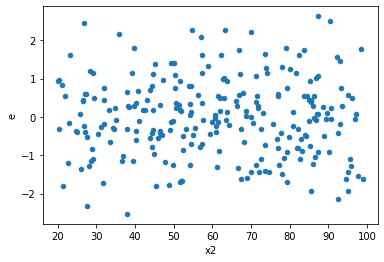

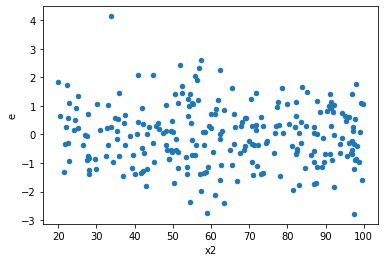

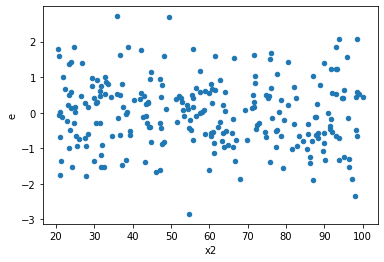

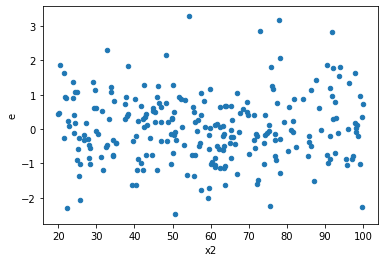

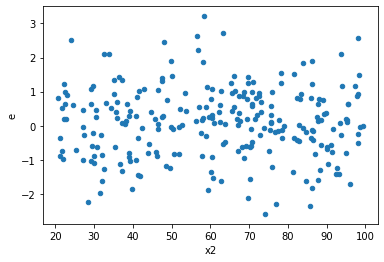

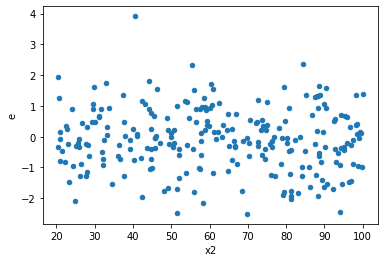

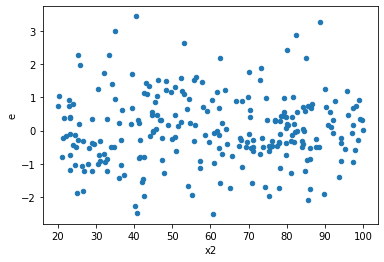

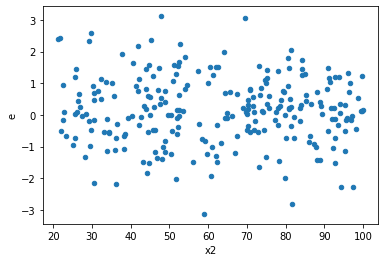

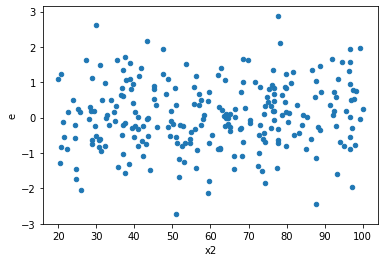

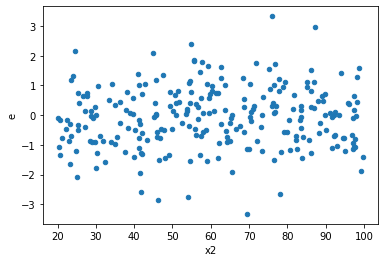

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,116.0,130.0,100.4274259181567,128.23234408607934,0.8657536717082475,0.9864026468159949,1.1393571624936814,0.46852217013820185,0.7657389149308991,0.23426108506910093,Reject001=1 : Homoscedasticity
4.0,121.0,125.0,109.02270824717027,147.23005872935482,0.9010141177452089,1.1778404698348386,1.3072386399254083,0.13825922532846469,0.9308703873357677,0.06912961266423234,Reject001=1 : Homoscedasticity
5.0,123.0,123.0,119.23269328085772,127.02441679800692,0.9693714900882742,1.0327188357561539,1.0653488846284422,0.7261236814763308,0.6369381592618346,0.3630618407381654,Reject001=1 : Homoscedasticity
8.0,121.0,125.0,95.3036350343053,119.41357682781998,0.7876333473909529,0.9553086146225599,1.2128849264534491,0.2852308457610746,0.8573845771194627,0.1426154228805373,Reject001=1 : Homoscedasticity
10.0,120.0,126.0,130.51792883182307,139.97285946713978,1.087649406931859,1.110895710056665,1.0213729745786202,0.9056917765497285,0.5471541117251357,0.45284588827486427,Reject001=1 : Homoscedasticity
14.0,112.0,134.0,101.2846687331939,145.74105178253717,0.9043273994035169,1.0876197894219193,1.202683663172541,0.30549600309985503,0.8472519984500725,0.15274800154992751,Reject001=1 : Homoscedasticity
19.0,116.0,130.0,91.70338622824067,134.88031902125485,0.7905464330020748,1.0375409155481141,1.31243513629944,0.13176854797216486,0.9341157260139176,0.06588427398608243,Reject001=1 : Homoscedasticity
23.0,121.0,125.0,106.10765318108396,123.99016155456637,0.8769227535626773,0.9919212924365309,1.1311387330373726,0.4947154374437792,0.7526422812781104,0.2473577187218896,Reject001=1 : Homoscedasticity
25.0,113.0,133.0,89.54592755533392,160.14042671707682,0.7924418367728665,1.2040633587750136,1.5194343646448945,0.02050246103608222,0.9897487694819589,0.01025123051804111,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,126.0,131.03476814337208,117.07056341593108,1.0919564011947673,0.9291314556819926,0.8508869536049065,0.37303252986318897,Reject001=1 : Homoscedasticity
1.0,118.0,128.0,146.4898737858197,125.56290400844738,1.2414396083544041,0.9809601875659951,0.7901795471680747,0.19492504344527253,Reject001=1 : Homoscedasticity
2.0,121.0,125.0,107.64502376159315,110.44332923166957,0.8896282955503566,0.8835466338533565,0.9931638171499055,0.9705034228223366,Reject001=1 : Homoscedasticity
3.0,116.0,130.0,100.4274259181567,128.23234408607934,0.8657536717082475,0.9864026468159949,1.1393571624936814,0.46852217013820185,Reject001=1 : Homoscedasticity
4.0,121.0,125.0,109.02270824717027,147.23005872935482,0.9010141177452089,1.1778404698348386,1.3072386399254083,0.13825922532846469,Reject001=1 : Homoscedasticity
5.0,123.0,123.0,119.23269328085772,127.02441679800692,0.9693714900882742,1.0327188357561539,1.0653488846284422,0.7261236814763308,Reject001=1 : Homoscedasticity
6.0,138.0,108.0,175.7305704351034,95.57188495207896,1.273409930689155,0.8849248606673977,0.6949253648339984,0.043821929849957565,Reject001=1 : Homoscedasticity
7.0,118.0,128.0,137.1067518865159,140.9848044618622,1.1619216261569143,1.1014437848582985,0.947950154350214,0.7695271412418719,Reject001=1 : Homoscedasticity
8.0,121.0,125.0,95.3036350343053,119.41357682781998,0.7876333473909529,0.9553086146225599,1.2128849264534491,0.2852308457610746,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64